### I mapped to AgamP4 for the expression analysis instead of Acol because I got about 30% higher mapping. 

### allowed for up to 100 distinct alignments
### e.g. bowtie2 -q -k 100 --threads 4 -x Anopheles-gambiae-PEST_TRANSCRIPTS_AgamP4.2 -U ../trimmed/cyp1-C1-AE_S192_L007_R1_001.qc.fastq.gz -S cyp1-C1-AE_S192.sam
### run in parallel like: parallel --gnu --ungroup --nice 9 -a bt2.run

# Compare AgamP4 to AcolM1.2
### for file in /home/bradmain/gambiae/malphigs/raw/trimmed/*-*gz
### do
### echo "bowtie2 -q -k 100 --threads 4 -x Anopheles-coluzzii-Mali-NIH_TRANSCRIPTS_AcolM1.2 -U $file -S $(basename $file _L007_R1_001.qc.fastq.gz).sam2"
### done > Acol_Transcripts_BT2.sh

### run in parallel like: parallel --gnu --ungroup --nice 9 -a Acol_Transcripts_BT2.sh

In [ ]:
# Mapping statistics  -- AgamP4.2
import glob
import subprocess
import os

BT2_AgamP4_out = open("BT2_2_AgamP4_Transc.txt", 'w')
BT2_2_AgamP4_Transc = []
AgamP4 = glob.glob("/home/bradmain/gambiae/malphigs/raw/BitSeq/*.sam")
for file in AgamP4:
    #samtools flagstat to estimate mapping percent
    ID = os.path.basename(file)
    print(ID)
    percent = subprocess.getoutput('samtools flagstat %s | grep "mapped ("' % (file)).split()[-3].strip("(")
    BT2_AgamP4_out.write(ID)
    BT2_AgamP4_out.write("\t")
    BT2_AgamP4_out.write(percent)
    BT2_AgamP4_out.write("\n")    
BT2_AgamP4_out.close()

In [ ]:
# Mapping statistics -- Acol1.2
import glob
import subprocess
import os

BT2_Acol_out = open("BT2_2_Acol1.2_Transc.txt", 'w')
BT2_2_Acol_Transc = []
Acol = glob.glob("/home/bradmain/gambiae/malphigs/Acol/BT2_transcripts/*sam2")
for file in Acol:
    #samtools flagstat to estimate mapping percent
    ID = os.path.basename(file)
    print(ID)
    percent = subprocess.getoutput('samtools flagstat %s | grep "mapped ("' % (file)).split()[-3].strip("(")
    BT2_Acol_out.write(ID)
    BT2_Acol_out.write("\t")
    BT2_Acol_out.write(percent)
    BT2_Acol_out.write("\n")    
BT2_Acol_out.close()

In [22]:
import pandas as pd
import matplotlib.pyplot as P
%matplotlib inline
import numpy as np

#agam = pd.read_table("BT2_2_AgamP4_Transc.txt")
agam = pd.read_table("~/git/Malpighian_tubule_permethrin_response/BT2_2_AgamP4_Transc.txt")
agam.columns = ["sampleID", "percent"]
#acol = pd.read_table("BT2_2_Acol1.2_Transc.txt")
acol = pd.read_table("~/git/Malpighian_tubule_permethrin_response/BT2_2_Acol1.2_Transc.txt")
acol.columns = ["sample", "percent"]
acol["sampleID"] = acol["sample"].str.strip("2")
#print(acol)
compare = acol.merge(agam, on="sampleID")
print(compare)

#Mapping to AgamP4 increases mapping by >20%

                   sample percent_x              sampleID percent_y
0    cyp1-C1-AE_S192.sam2    61.11%   cyp1-C1-AE_S192.sam    83.37%
1   Mopti-C1-AE_S179.sam2    58.97%  Mopti-C1-AE_S179.sam    84.64%
2   Mopti-T2-BM_S187.sam2    56.26%  Mopti-T2-BM_S187.sam    87.42%
3   Mopti-T2-YY_S188.sam2    58.79%  Mopti-T2-YY_S188.sam    82.70%
4   Mopti-T1-AE_S185.sam2    55.78%  Mopti-T1-AE_S185.sam    85.56%
5   Mopti-C2-AE_S181.sam2    50.85%  Mopti-C2-AE_S181.sam    86.05%
6   Mopti-T3-AE_S190.sam2    61.13%  Mopti-T3-AE_S190.sam    81.59%
7    cyp1-C3-AE_S196.sam2    62.81%   cyp1-C3-AE_S196.sam    83.81%
8    cyp1-T3-AE_S202.sam2    62.21%   cyp1-T3-AE_S202.sam    82.70%
9   Mopti-T3-YY_S189.sam2    58.33%  Mopti-T3-YY_S189.sam    84.75%
10  Mopti-C1-BM_S180.sam2    55.84%  Mopti-C1-BM_S180.sam    85.02%
11   cyp1-C3-YY_S195.sam2    62.89%   cyp1-C3-YY_S195.sam    83.23%
12   cyp1-T1-AE_S198.sam2    62.14%   cyp1-T1-AE_S198.sam    83.18%
13   cyp1-T2-AE_S200.sam2    65.44%   cyp1-T2-AE

# Transcriptome block effect analysis -- EdgeR -> 6 ~bad MOPTI samples

## Run Kallisto on AgamP4 transcripts

In [10]:
import pandas as pd
#import matplotlib.pyplot as P
import matplotlib_venn as V

#K = pd.read_table("sleuth.AgamP4_transc_good_samples_DE_transcripts.pval_0.01.txt")
K = pd.read_table("sleuth.AgamP4_transc_good_samples_DE_transcripts.pval_0.05.txt")
K_genes = pd.DataFrame(K['target_id'].str.split("-").tolist())
K_gene_list = set(K_genes[0].tolist())
#V.venn2([K_gene_list,deseq_set], ("Kallisto", "DESeq"))
###V.venn2([K_gene_list,deseq_AgamP4], ("Kallisto", "DESeq"))
###overlap = list(K_gene_list & deseq_AgamP4)
#for G in overlap:
#    print(G)
#paste these into g:profiler : http://biit.cs.ut.ee/gprofiler/index.cgi
#GO:0008150
#biological_process
#p = 0.01
#Reid, William R., Lee Zhang, Feng Liu, and Nannan Liu. 2012. “The Transcriptome Profile of the Mosquito Culex Quinquefasciatus Following Permethrin Selection.” PloS One 7 (10): e47163.

## Map to AgamP4 trascripts for BitSeq analysis

### Mapped to Anopheles-gambiae-PEST_TRANSCRIPTS_AgamP4.2

### allowed for up to 100 distinct alignments

#### e.g. bowtie2 -q -k 100 --threads 4 -x Anopheles-gambiae-PEST_TRANSCRIPTS_AgamP4.2 -U ../trimmed/cyp1-C1-AE_S192_L007_R1_001.qc.fastq.gz -S cyp1-C1-AE_S192.sam
	 

#### run in parallel like: parallel --gnu --ungroup --nice 9 -a bt2.run

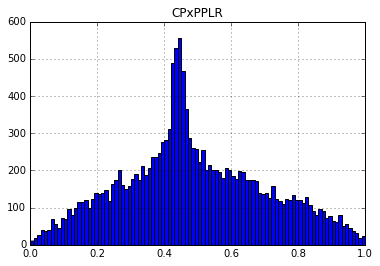

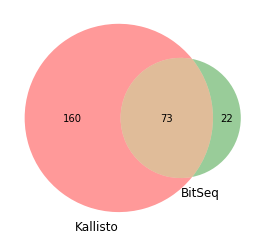

In [9]:
import pandas as pd
import matplotlib.pyplot as P
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib_venn as V

#input BitSeq data (good samples) mapped to AgamP4 transcripts
BAgamP4 = pd.read_csv("/home/bradmain/gambiae/malphigs/raw/BitSeq/overall.pplr",delim_whitespace=True, comment="#", header=None)
BAgamP4.columns = ['CPxPPLR', 'log2FC', 'ConfidenceLow', 'ConfidenceHigh', 'logmean_C', 'logmean_T']

P.figure()
BAgamP4.hist(column="CPxPPLR", bins=100)
AgamP4_genes = [line.strip().split()[1] for line in open("/home/bradmain/gambiae/malphigs/raw/BitSeq/Mopti-T3-YY_S189.tr") if line[0]!="#"]
BAgamP4['ID'] = AgamP4_genes
P.figure()

#top_bitseq = BAgamP4.loc[BAgamP4['CPxPPLR'] > 0.95]
#bit_genes = set([i.split('-')[0] for i in top_bitseq['ID']])
#V.venn3([K_gene_list,deseq_AgamP4,bit_genes], ("Kallisto", "DESeq","BitSeq"))


#Select the top 5% (2.5 from top and 2.5 from bottom)
all_bitseq = BAgamP4.loc[(BAgamP4['CPxPPLR'] <= 0.025) | (BAgamP4['CPxPPLR'] >= 0.975)]


bit_genes = set([i.split('-')[0] for i in all_bitseq['ID']])

#V.venn3([K_gene_list,deseq_AgamP4,bit_genes], ("Kallisto", "DESeq","BitSeq"))
V.venn2([K_gene_list,bit_genes], ("Kallisto","BitSeq"))
#P.title("Top Diff Exp Genes by Method")


#for l in bit_genes:
#    print(l)

## DESeq2 mapped to AgamP4 transcripts 

In [1]:
%%bash
#convert stranded RNAseq sam file to count data with express
for F in *sam ; do echo "~/bin/express-1.5.1-linux_x86_64/express --r-stranded -o $F.express ~/gambiae/malphigs/raw/BitSeq/Anopheles-gambiae-PEST_TRANSCRIPTS_AgamP4.2.fa $F"; done > express.run2
#for bam in /home/bradmain/gambiae/malphigs/raw/BitSeq/*.sam ; do  echo "~/bin/express-1.5.1-linux_x86_64/express --r-stranded -o $bam.eXpresscounts ~/gambiae/malphigs/raw/BitSeq/Anopheles-gambiae-PEST_TRANSCRIPTS_AgamP4.2.fa $bam"; done > express.run 
#head express.run


In [7]:
## Make a DataFrame of the count data
import glob
import pandas as pd

effcount_files = glob.glob("/home/bradmain/gambiae/malphigs/raw/BitSeq/*express/results.xprs")
seed_file = pd.read_table("/home/bradmain/gambiae/malphigs/raw/BitSeq/Mopti-C2-YY_S182.sam.express/results.xprs")
counts_df = seed_file[['target_id','eff_counts']]
counts_df.columns = ['ID','Mopti-C2-YY_S182']

for f in effcount_files:
    sample_df = pd.read_table(f)
    label = f.split('/')[-2].strip(".sam.express")
    data = sample_df[['target_id','eff_counts']]
    data.columns = ['ID',label]
    headers = counts_df.dtypes.index
    if label not in headers:
        counts_df = pd.merge(counts_df,data, on="ID")
counts_df.to_csv('allsamples_effcounts.csv',index=False)
#I'll read this csv into R next.

In [8]:
%load_ext rpy2.ipython
#Load R magic

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
%%R
counts.data = read.csv('allsamples_effcounts.csv')
gt = regmatches(colnames(counts.data),regexpr("Mopti|cyp1",colnames(counts.data)))
head(sampleTable)


             ID Mopti.C2.YY_S182 Mopti.T3.YY_S189 cyp1.T2.YY_S199
1 AGAP005129-RA        137.87669        136.50606       247.96504
2 AGAP009071-RA        207.83017        230.92998       316.24801
3 AGAP007763-RA         40.76057         49.97897        59.35500
4 AGAP004782-RA         45.92718         48.88199        86.77709
5 AGAP002636-RA          0.00000          0.00000         0.00000
6 AGAP004198-RA          0.00000          0.00000         0.00000
  cyp1.C1.AE_S192 cyp1.T3.AE_S202 cyp1.T1.YY_S197 Mopti.C1.BM_S180
1       175.10346      208.447621        325.4728         87.43378
2       265.14849      367.119564        358.6564        322.63783
3        52.37849       62.558710        103.6117         32.24005
4        52.21402       75.801930        103.6513         80.32521
5         0.00000        0.000000          0.0000          0.00000
6         0.00000        1.560181          0.0000          0.00000
  Mopti.T2.BM_S187 Mopti.C3.YY_S183 cyp1.C3.AE_S196 Mopti.T2.YY_S188


In [ ]:
%%bash
# You should map with tophat so we can id new transcripts
# Map without giving GFF file
for file in trimmed/Mopti*qc.fastq.gz
do
echo "/mnt/popi/home/travc/install/bowtie2/tophat-2.0.14.Linux_x86_64/tophat --num-threads 8 --library-type fr-firststrand -o tophat/$(basename $file _L007_R1_001.qc.fastq.gz).stranded_noGTF /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4 $file; java -jar /usr/local/picard-tools/AddOrReplaceReadGroups.jar I=tophat/$(basename $file _L007_R1_001.qc.fastq.gz).stranded_noGTF/accepted_hits.bam O=tophat/$(basename $file _L007_R1_001.qc.fastq.gz).stranded_noGTF/$(basename $file _L007_R1_001.qc.fastq.gz)_sorted_stranded.bam SORT_ORDER=coordinate RGID='malphig_2016_04_25_$(basename $file _L007_R1_001.qc.fastq.gz)' RGLB='Kappa_stranded_mRNAseq-$(basename $file _L007_R1_001.qc.fastq.gz)' RGPL='ILLUMINA' RGPU='4000' RGSM='$(basename $file _L007_R1_001.qc.fastq.gz)' VALIDATION_STRINGENCY=LENIENT CREATE_INDEX=true"
done
> tophat_mopti_noGTF.run
parallel --gnu --ungroup --nice 9 -a tophat_mopti_noGTF.run
for file in trimmed/cyp1*qc.fastq.gz
do
echo "/mnt/popi/home/travc/install/bowtie2/tophat-2.0.14.Linux_x86_64/tophat --num-threads 8 --library-type fr-firststrand -o tophat/$(basename $file _L007_R1_001.qc.fastq.gz).stranded_noGTF /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4 $file; java -jar /usr/local/picard-tools/AddOrReplaceReadGroups.jar I=tophat/$(basename $file _L007_R1_001.qc.fastq.gz).stranded_noGTF/accepted_hits.bam O=tophat/$(basename $file _L007_R1_001.qc.fastq.gz).stranded_noGTF/$(basename $file _L007_R1_001.qc.fastq.gz)_sorted_stranded.bam SORT_ORDER=coordinate RGID='malphig_2016_04_25_$(basename $file _L007_R1_001.qc.fastq.gz)' RGLB='Kappa_stranded_mRNAseq-$(basename $file _L007_R1_001.qc.fastq.gz)' RGPL='ILLUMINA' RGPU='4000' RGSM='$(basename $file _L007_R1_001.qc.fastq.gz)' VALIDATION_STRINGENCY=LENIENT CREATE_INDEX=true"
done
> tophat_cyp1_noGTF.run
parallel --gnu --ungroup --nice 9 -a tophat_cyp1_noGTF.run

In [ ]:
cufflinks

In [ ]:
for g in deseq_AgamP4:
    print(g)

AGAP013005 [nan]
AGAP010973 [ 'Sodium/potassium/calcium exchanger 3 [Source:VB External Description;Acc:AGAP010973]']
AGAP005948 [ 'Kynurenine 3-monooxygenase [Source:VB External Description;Acc:AGAP005948]']
Tene et al 2013 DDT resistance
Waisberg et al 2014 'Plasmodium Falciparum Infection Induces Expression of a Mosquito Salivary Protein'


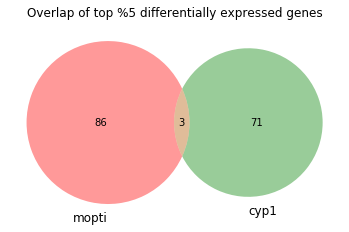

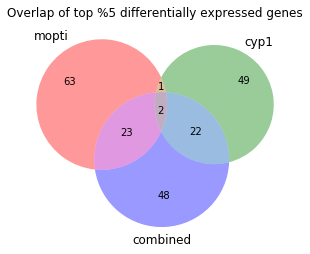

In [6]:
import pandas as pd
import matplotlib.pyplot as P
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib_venn as V
#input BitSeq data (good samples)

mopti = pd.read_csv("/home/bradmain/gambiae/malphigs/raw/BitSeq/mopti.pplr",delim_whitespace=True, comment="#", header=None)
mopti.columns = ['CPxPPLR', 'log2FC', 'ConfidenceLow', 'ConfidenceHigh', 'logmean_C', 'logmean_T']

cyp1 = pd.read_csv("/home/bradmain/gambiae/malphigs/raw/BitSeq/cyp1.pplr",delim_whitespace=True, comment="#", header=None)
cyp1.columns = ['CPxPPLR', 'log2FC', 'ConfidenceLow', 'ConfidenceHigh', 'logmean_C', 'logmean_T']
cyp1['ID'] = AgamP4_genes
mopti['ID'] = AgamP4_genes
#print(mopti)

top_cut = 0.975
bottom_cut = 0.025

#Select the top 5% (2.5 from top and 2.5 from bottom)
mopti_diff = mopti.loc[(mopti['CPxPPLR'] <= bottom_cut) | (mopti['CPxPPLR'] >= top_cut)]
cyp1_diff = cyp1.loc[(cyp1['CPxPPLR'] <= bottom_cut) | (cyp1['CPxPPLR'] >= top_cut)]

mopti_genes = set([i.split('-')[0] for i in mopti_diff['ID']])
cyp1_genes = set([i.split('-')[0] for i in cyp1_diff['ID']])

#V.venn2([K_gene_list,deseq_AgamP4,bit_genes], ("Kallisto", "DESeq","BitSeq"))
P.figure()
P.title("Overlap of top %5 differentially expressed genes")
V.venn2([mopti_genes,cyp1_genes], ("mopti", "cyp1"))
P.figure()
P.title("Overlap of top %5 differentially expressed genes")
V.venn3([mopti_genes,cyp1_genes,bit_genes], ("mopti", "cyp1","combined"))

M_cyp_overlap = list(mopti_genes & cyp1_genes)
names = pd.read_table("AgamP4_gene_names.txt")
#print(names)
for gene in M_cyp_overlap:
    #print(gene,names.loc[names["Gene stable ID"]== gene])
    descrip = names.loc[names["Gene stable ID"]== gene]['Gene description']
    print(gene, descrip.values)
    #print(names.loc[names["Gene stable ID"]== gene]['Gene description'])
print("Tene et al 2013 DDT resistance")
print("Waisberg et al 2014 'Plasmodium Falciparum Infection Induces Expression of a Mosquito Salivary Protein'")


In [ ]:
#Star and then stranded counts to DESeq2

In [1]:
%load_ext rpy2.ipython

In [6]:
%%R
library('DESeq2')

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


  warnings.warn(x, RR

In [8]:
%%R

#directory<-'/home/bradmain/gambiae/malphigs/raw/tophat/counts_no_batcheffect_files'
directory<-'/home/bradmain/gambiae/malphigs/raw/STAR'
#use grep to search for the 'treated' part of filename to collect files
sampleFiles<-grep('stranded_counts',list.files(directory),value=TRUE)
#print(sampleFiles)
sampleCondition<-c('untreated','untreated','untreated','untreated','untreated','untreated',
                   'treated','treated','treated','treated','treated','treated',
                  'untreated','untreated','untreated','untreated','untreated','untreated',
                  'treated','treated','treated','treated','treated','treated')
sampleTable<-data.frame(sampleName=sampleFiles, fileName=sampleFiles, condition=sampleCondition)

 
ddsHTSeq<-DESeqDataSetFromHTSeqCount(sampleTable=sampleTable, directory=directory, design=~condition)

colData(ddsHTSeq)$condition<-factor(colData(ddsHTSeq)$condition, levels=c('untreated','treated'))

In [14]:
%%R
dds<-DESeq(ddsHTSeq)
res<-results(dds)
#res<-res[order(res$padj),]
print(dds)

class: DESeqDataSet 
dim: 13793 24 
exptData(0):
assays(5): counts mu cooks replaceCounts replaceCooks
rownames(13793): AGAP004677 AGAP004678 ... AGAP028392 AGAP028393
rowData metadata column names(26): baseMean baseVar ... maxCooks
  replace
colnames(24): cyp1-C1-AE_S192stranded_counts.out
  cyp1-C1-YY_S191stranded_counts.out ...
  Mopti-T3-AE_S190stranded_counts.out
  Mopti-T3-YY_S189stranded_counts.out
colData names(3): condition sizeFactor replaceable


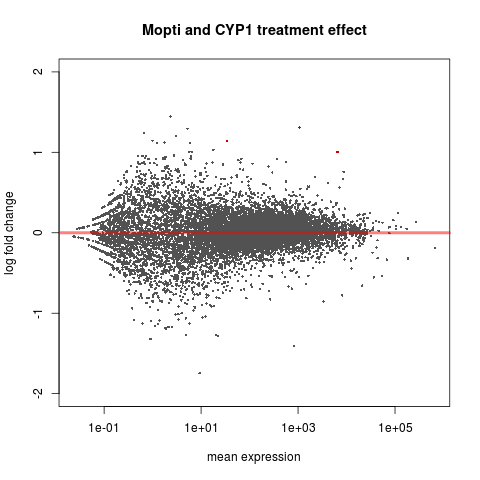

In [13]:
%%R
plotMA(dds,ylim=c(-2,2),main='Mopti and CYP1 treatment effect')
write.csv(as.data.frame(res),file='mopti_cyp1_treatment_effect_DESeq2.csv')
